In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from ipywidgets import interact, fixed
import ipywidgets as widgets

from src import data,paths

plt.rcParams['figure.figsize'] = [10, 5]

%matplotlib inline

!date -I

2024-03-11


In [2]:
empirical = np.load(paths.path('external/pytepfit/source_estimates/empirical.npz'))
empirical['ts'].shape

(400, 200)

In [3]:
simulated = np.load(paths.path('external/pytepfit/source_estimates/simulated.npz'))
simulated['ts'].shape

(400, 200)

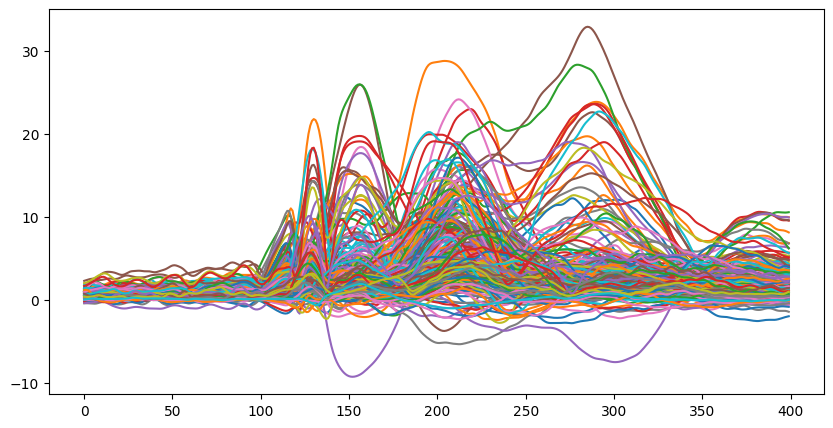

In [4]:
empirical_ts = empirical['ts']
plt.plot(empirical_ts);

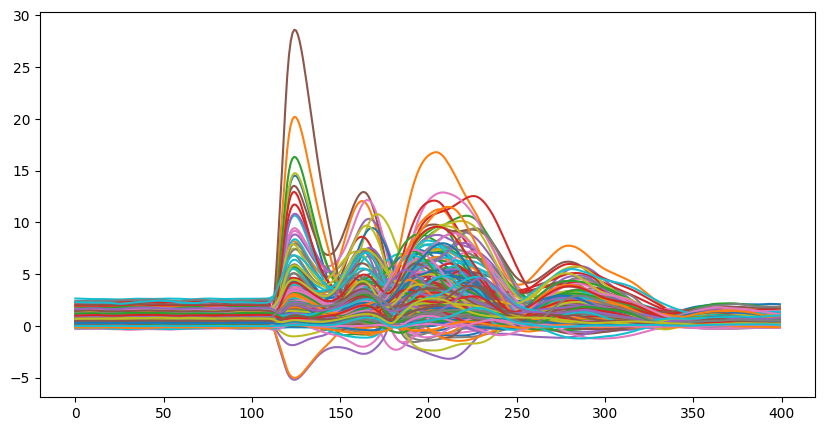

In [5]:
simulated_ts = simulated['ts']
plt.plot(simulated_ts);

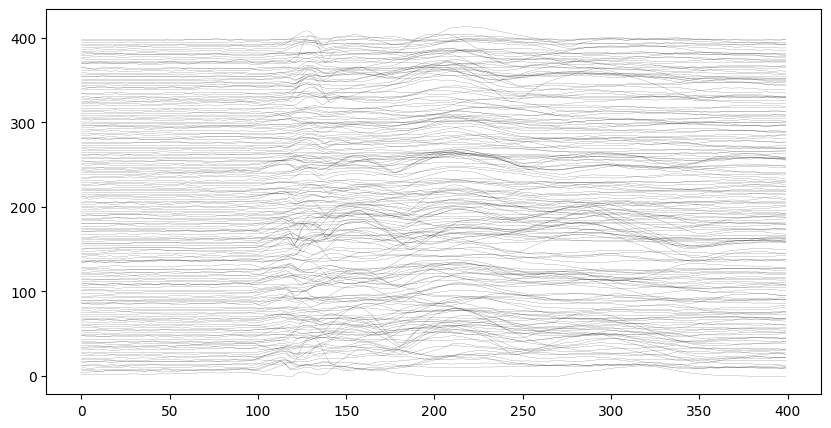

In [6]:
plt.plot(empirical_ts * 2 + np.arange(200)*2, 'k-', lw=0.1);

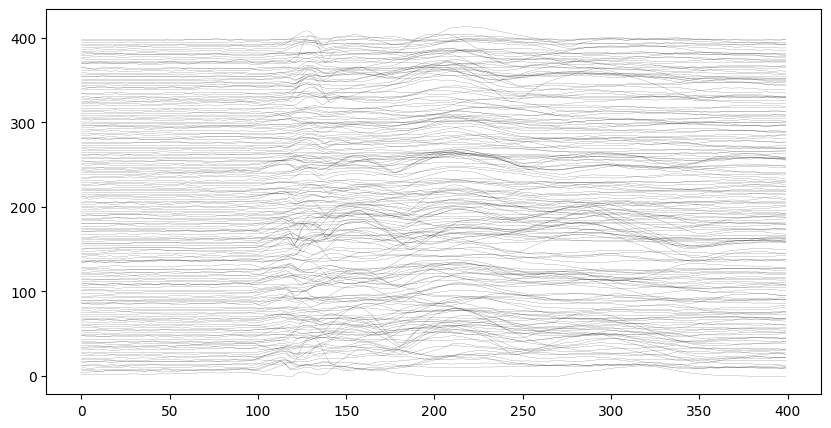

In [7]:
plt.plot(empirical_ts * 2 + np.arange(200)*2, 'k-', lw=0.1);

In [8]:
stim_locatin = 85 # constant set based on previous notebooks

Text(0.5, 1.0, 'ROI distances')

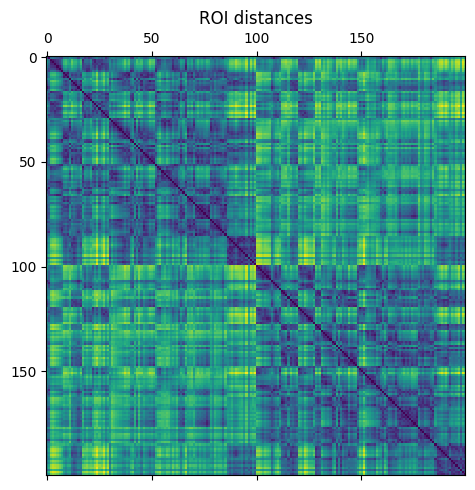

In [9]:
ED = data.roi_distances_from_centroids(paths.path('external/schaefer_parcellation_centroids/ROI_MAPPING_pytpefit.csv'),"geom_mne")

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.matshow(ED)
axs.set_title("ROI distances")

In [10]:
n_roi = empirical_ts.shape[1]

def plot(roi):
    fig, ax = plt.subplots()
    ax.plot( empirical_ts[:,roi], label='empirical');
    ax.plot( simulated_ts[:,roi], label='simulated');
    ax.set_ylim([-10,30])
    plt.plot([100,100], [-5,5], color="green")
    ax.legend(title=f'roi {roi}')

interact(plot, roi=widgets.IntSlider(max=n_roi-1))

interactive(children=(IntSlider(value=0, description='roi', max=199), Output()), _dom_classes=('widget-interac…

<function __main__.plot(roi)>

In [11]:
arg = np.argsort(ED[stim_locatin])

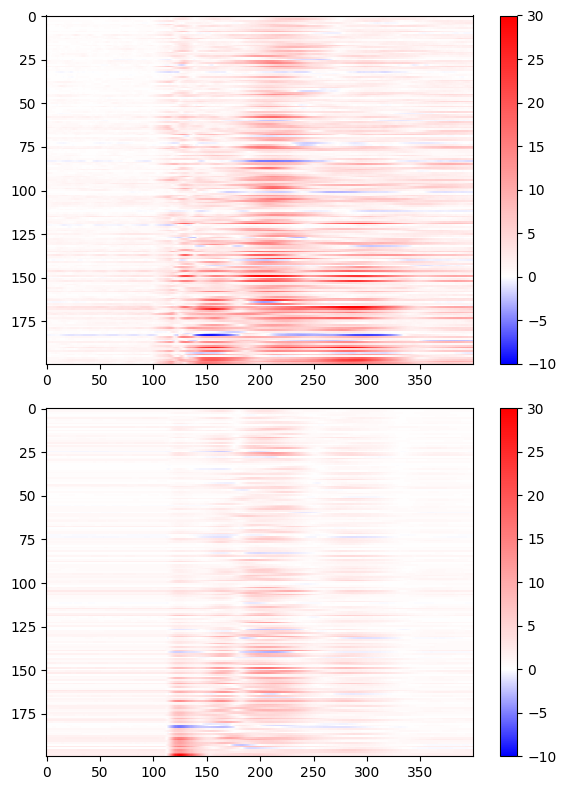

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(6,8))

kwds = dict(interpolation='none', aspect='auto', cmap='bwr', norm=colors.TwoSlopeNorm(vmin=-10, vmax=30, vcenter=0.))

for ax, ts in zip(axs.flatten(), [empirical_ts[:,np.flip(arg)].T, simulated_ts[:,np.flip(arg)].T]):
    im = ax.imshow(ts, **kwds)
    cb = plt.colorbar(im, ax=ax)
    cb.ax.set_yscale('linear')

fig.tight_layout()

In [18]:
def plot(thr,ts):
    plt.rcParams['figure.figsize'] = [10,8]

    plt.imshow(
        ts.T > thr,
        aspect='auto',  cmap='binary', extent=[0,400,0,200])
    plt.plot([100,100], [0,200], color="r")
    plt.xlabel("time [ms]")
    

The following plots show for each ROI in one line (sorted by Euclidean distance to the stimulated location) if the ROI activation in a given time exceeds the threshold.

In [19]:
interact(plot, thr=widgets.IntSlider(max=25, min=1),ts=fixed(empirical_ts[:,np.flip(arg)]))

interactive(children=(IntSlider(value=1, description='thr', max=25, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot(thr, ts)>

In [20]:
interact(plot, thr=widgets.IntSlider(max=25, min=1),ts=fixed(simulated_ts[:,np.flip(arg)]))

interactive(children=(IntSlider(value=1, description='thr', max=25, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plot(thr, ts)>